# Bank Marketing

## Description of the data

### Input features:

#### bank client data:
  1. age (numeric)
  2. job : type of job (categorical: "admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown"
  3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
  4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
  5. default: has credit in default? (categorical: "no","yes","unknown")
  6. housing: has housing loan? (categorical: "no","yes","unknown")
  7. loan: has personal loan? (categorical: "no","yes","unknown")

#### related with the last contact of the current campaign:
  8. contact: contact communication type (categorical: "cellular","telephone") 
  9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
  12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14. previous: number of contacts performed before this campaign and for this client (numeric)
  15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

#### social and economic context attributes
  16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17. cons.price.idx: consumer price index - monthly indicator (numeric)     
  18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19. euribor3m: euribor 3 month rate - daily indicator (numeric)
  20. nr.employed: number of employees - quarterly indicator (numeric)


### Output variable (desired target):
  21. y - has the client subscribed a term deposit? (binary: "yes","no")

### Goal
 The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

## Exploratory Data Analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
from plotnine import *
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

### Descriptive Statistics

In [3]:
df.shape

(41188, 21)

In [4]:
df = df.drop_duplicates()
df.shape

(41176, 21)

In [5]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Features

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype='object')

#### Numeric features

In [9]:
df.select_dtypes(include=['number']).columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype='object')

In [10]:
for c in df.select_dtypes(include=['number']).columns:
    print(c, '\t' ,df[c].nunique())
numeric_features = df.select_dtypes(include=['number']).columns 

age 	 78
duration 	 1544
campaign 	 42
pdays 	 27
previous 	 8
emp.var.rate 	 10
cons.price.idx 	 26
cons.conf.idx 	 26
euribor3m 	 316
nr.employed 	 11


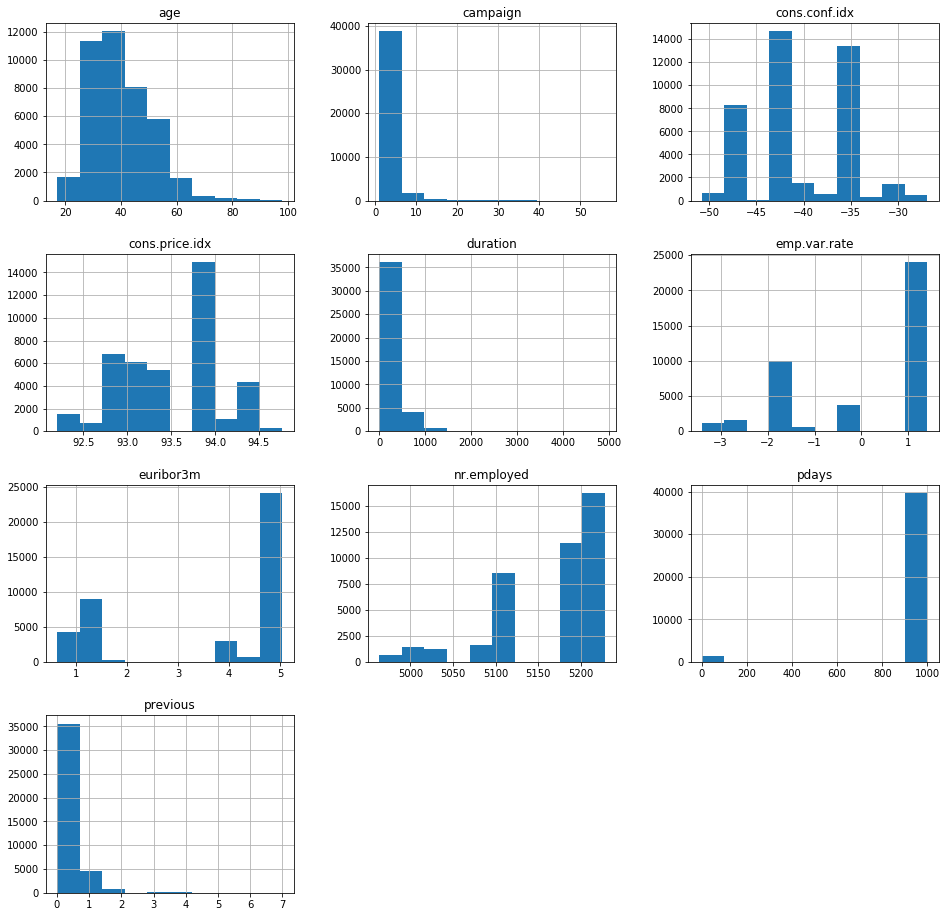

In [11]:
df.hist(figsize=(16, 16))
plt.show()

#### Categorical features

Categorical features are divided into Oridinal features and Nominal features. In Ordinal features, the value has some meaningfull order. For example in `poutcome`, `succes` is higher than failure. But in nominal variables order doesn't matter.

In [12]:
df.select_dtypes(include=['object']).drop(['y'], axis=1).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], dtype='object')

In [13]:
for c in df.select_dtypes(include=['object']).drop(['y'], axis=1).columns:
    print(c, ": ", df[c].unique().tolist())
    
categorical_features = df.select_dtypes(include=['object']).drop(['y'], axis=1).columns

job :  ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
marital :  ['married', 'single', 'divorced', 'unknown']
education :  ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
default :  ['no', 'unknown', 'yes']
housing :  ['no', 'yes', 'unknown']
loan :  ['no', 'yes', 'unknown']
contact :  ['telephone', 'cellular']
month :  ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
day_of_week :  ['mon', 'tue', 'wed', 'thu', 'fri']
poutcome :  ['nonexistent', 'failure', 'success']


##### Ordinal Features

In [14]:
ordinal_features_lst = ['default', 'housing', 'loan', 'poutcome']
for col in ordinal_features_lst:
    print(col, df[col].unique())

default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
poutcome ['nonexistent' 'failure' 'success']


In [15]:
ordinal_features = df[ordinal_features_lst].columns

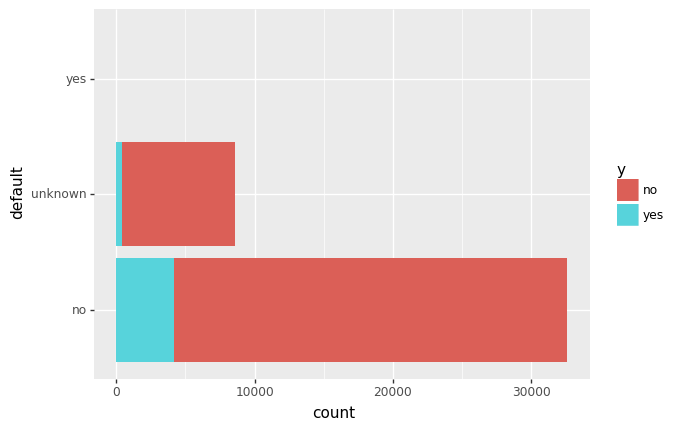

<ggplot: (-9223363250686298396)>


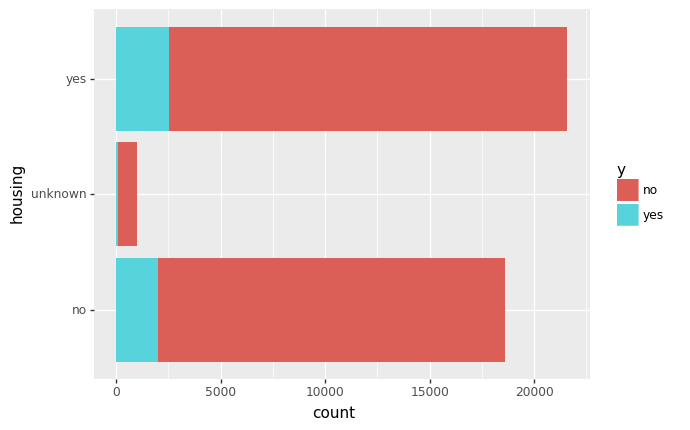

<ggplot: (-9223363250686316863)>


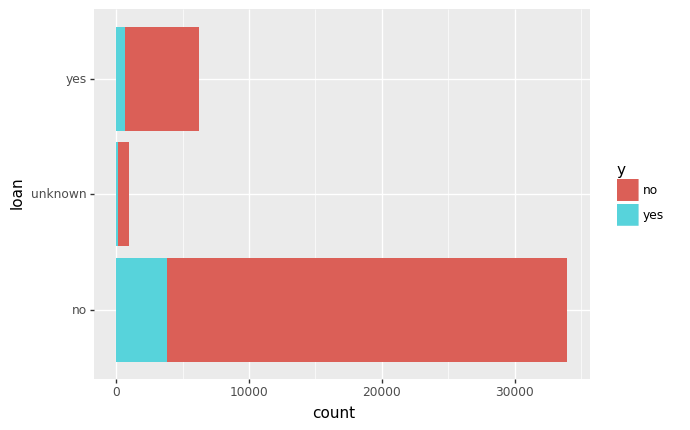

<ggplot: (-9223363250685965389)>


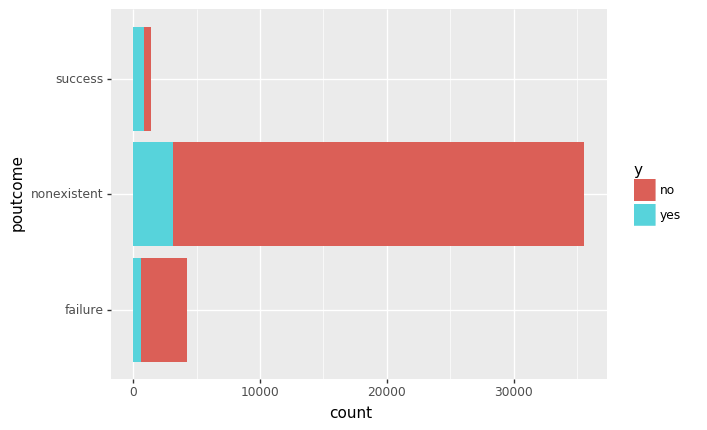

<ggplot: (-9223363250686020990)>


In [16]:
for col in ordinal_features:
    f = ggplot(df) + geom_bar(stat='count') + aes(x=col, fill='y') + coord_flip()
    print(f)
    

##### Nominal Features

In [17]:
nominal_features_lst = [c for c in categorical_features if c not in ordinal_features]
nominal_features = df[nominal_features_lst].columns
print(nominal_features)

Index(['job', 'marital', 'education', 'contact', 'month', 'day_of_week'], dtype='object')


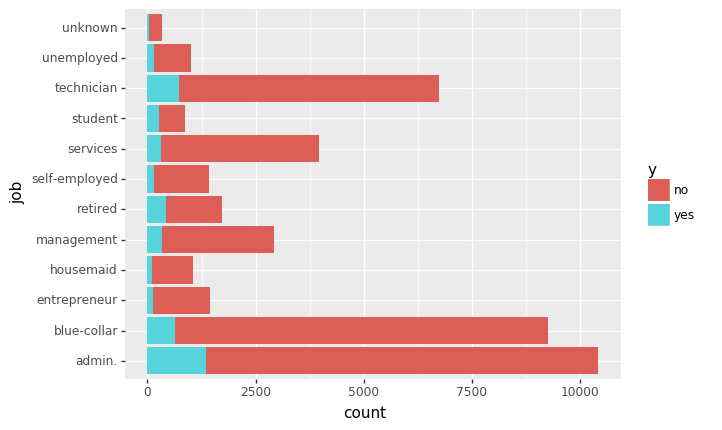

<ggplot: (8786169269782)>


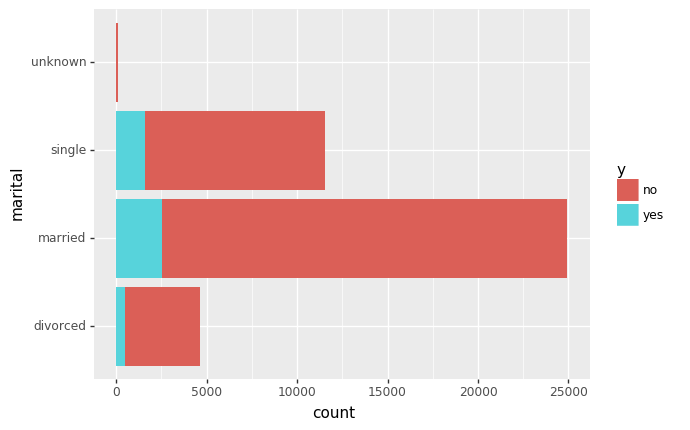

<ggplot: (8786168747910)>


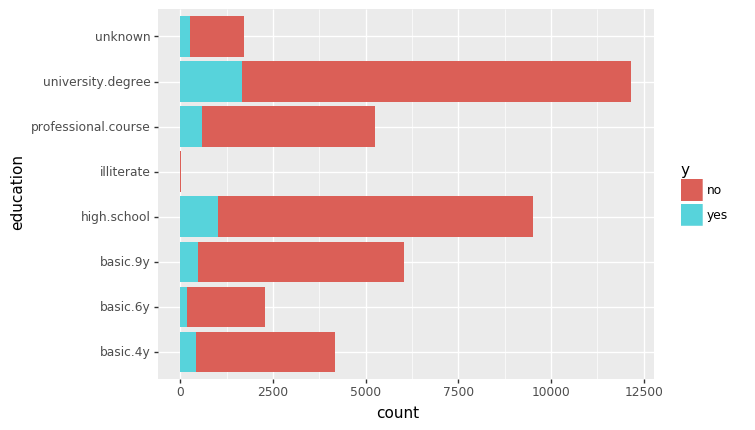

<ggplot: (-9223363250685527741)>


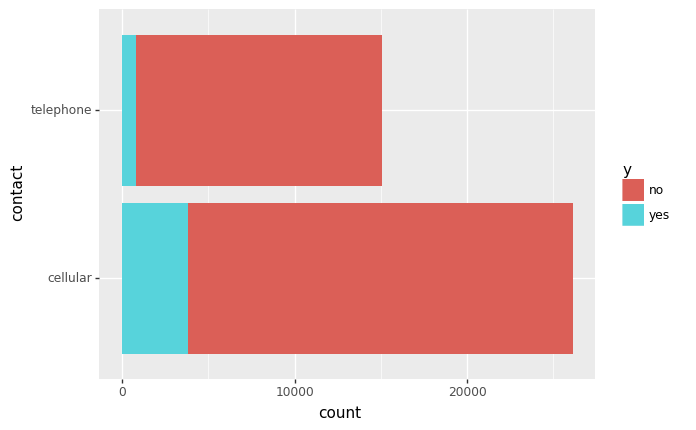

<ggplot: (8786168477318)>


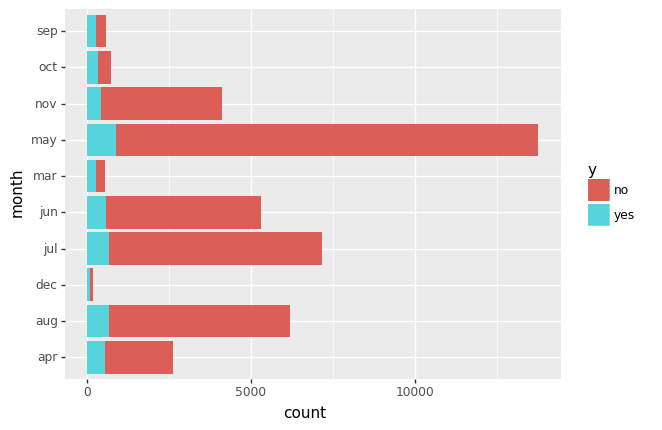

<ggplot: (-9223363250685980065)>


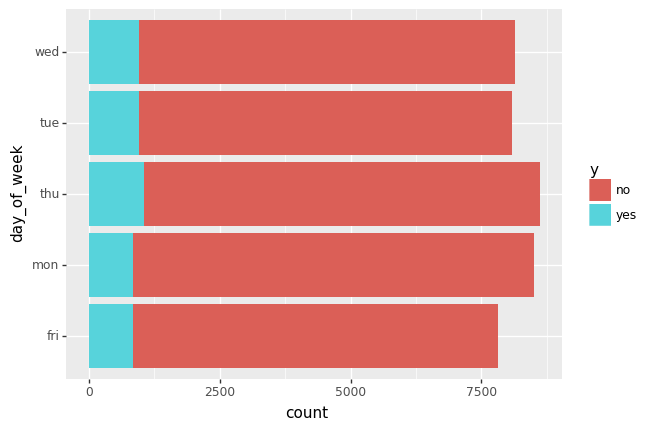

<ggplot: (8786169616704)>


In [18]:
for col in nominal_features_lst:
    f = ggplot(df) + geom_bar(stat='count') + aes(x=col, fill='y') + coord_flip()
    print(f)


### Check for Null values

In [19]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
for c in df.select_dtypes(include=['object']).drop(['y'], axis=1).columns:
    print(c, len(df[df[c]=='unknown']))

job 330
marital 80
education 1730
default 8596
housing 990
loan 990
contact 0
month 0
day_of_week 0
poutcome 0


###  Correlation Matrix

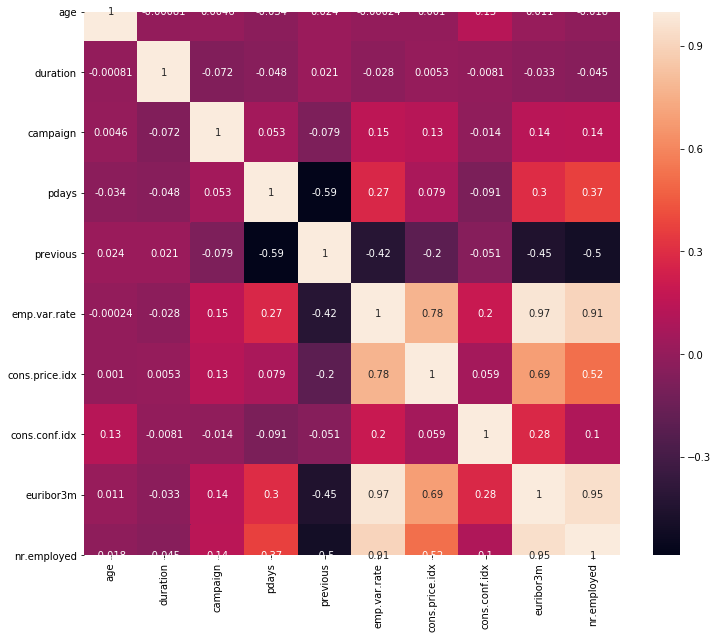

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(method='pearson'), annot=True)

### Check balance/imbalance 

In [22]:
df['y'].value_counts()/df['y'].count()

no     0.887337
yes    0.112663
Name: y, dtype: float64

In [23]:
le = LabelEncoder()
df['y_dummy'] = le.fit_transform(df['y'])

In [24]:
# sns.pairplot(df, hue='y', palette="Set2", height=1.5)

In [25]:
# for i, col in enumerate(categorical_features):
#     temp = df['y_dummy'].groupby(df[col]).mean().reset_index()
#     plt.figure(i)
#     plt.figure(figsize=[df[col].nunique(),4])
#     g = sns.barplot(x=col, y= 'y_dummy', data=temp,palette="Set2")
#     g.set_xticklabels(g.get_xticklabels(), rotation=45)

In [26]:
# for col in numeric_features:
#     fig = plt.figure(figsize=[12,5])
#     sns.distplot(df[df['y']=='yes'][col], rug=True, hist=False)
#     sns.distplot(df[df['y']=='no'][col], rug=True, hist=False)
#     fig.legend(labels=['yes','no'])
#     plt.show()

## Model

### preparing the data for the mdeoling

In [27]:
df.shape

(41176, 22)

#### Spilit to test/train

In [28]:
# code for split
from sklearn.model_selection import train_test_split

response_varibale = ['y']
selected_features = [c for c in df.columns if c in nominal_features or c in ordinal_features or c in numeric_features]
X = df[selected_features]
y = df[response_varibale]
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, stratify=y  ,test_size=0.25, random_state=0)

print(X.shape, X.shape)
print(X_train_df.shape, y_train_df.shape)
print(X_test_df.shape, y_test_df.shape)

(41176, 20) (41176, 20)
(30882, 20) (30882, 1)
(10294, 20) (10294, 1)


#### Over Sampling

In [29]:
# code for Over sampling


train = pd.concat([X_train_df, y_train_df], axis=1)


# Divide by class
train_yes = train[train.y == 'yes']
train_no = train[train.y == 'no']

train_no_count = len(train_no)
train_yes_count = len(train_yes)


train_yes_over_sampled = train_yes.sample(train_no_count, replace=True)
train_over_sampled = pd.concat([train_no, train_yes_over_sampled], axis=0)

X_train_over_sampled = train_over_sampled[selected_features]
y_train_over_sampled = train_over_sampled[response_varibale]


print(train_over_sampled.y.value_counts())

print('train_no_count : ', train_no_count)
print('test_no_count : ', train_yes_count)
print(X_train_over_sampled.shape)
print(y_train_over_sampled.shape)

no     27403
yes    27403
Name: y, dtype: int64
train_no_count :  27403
test_no_count :  3479
(54806, 20)
(54806, 1)


#### Binarizing lables

In [30]:
from sklearn.preprocessing import LabelBinarizer 
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train_df)
y_test = lb.fit_transform(y_test_df)
y_train_over_sampled = lb.fit_transform(y_train_over_sampled)

#### Creating Pipeline

In [31]:
# Target encoding varables

import category_encoders as ce
# X_train.head()
enc = ce.TargetEncoder(cols=['job', 'education', 'month', 'day_of_week']).fit(X_train_df, y_train)

X_train_encoded = enc.transform(X_train_df, y_train)
X_test_encoded = enc.transform(X_test_df)

X_train_over_sampled_encoded = enc.transform(X_train_over_sampled)



In [32]:
# redefining columns
numeric_features = [c for c in df.select_dtypes(include=['number']).columns if c not in ['y_dummy']]
print('numeric_features:', numeric_features)

categorical_features = df.select_dtypes(include=['object']).drop(['y'], axis=1).columns
print('categorical_features :', categorical_features)

ordinal_features = [c for c in categorical_features if c in ['default', 'housing', 'loan', 'poutcome']]
print('ordinal_features :', ordinal_features)

target_encoding_features = [c for c in categorical_features if c in ['job', 'education', 'month', 'day_of_week']]
# print('target_encoding_features :', target_encoding_features)

nominal_features = [c for c in categorical_features if c not in ordinal_features and c not in target_encoding_features]
print('nominal_features :', nominal_features)

numeric_features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features : Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], dtype='object')
ordinal_features : ['default', 'housing', 'loan', 'poutcome']
nominal_features : ['marital', 'contact']


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce


# transformation for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# transformation for nominal features
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unkown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# transformation for ordinal transformation
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unkown')),
    ('ordinal', OrdinalEncoder([['yes','unknown','no'],
                                ['yes','unknown','no'],
                                ['yes','unknown','no'],
                                ['failure','nonexistent', 'success']])),
    ('scaler', MinMaxScaler())
])

# enc = ce.TargetEncoder(cols=['job', 'education']).fit(X_train_df, y_train)

# target_encoding = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='unkown')),
#     ('target_encoder', enc),
#     ('scaler', MinMaxScaler())
# ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features),
#         ('enc', target_encoding, target_encoding_features),
    ])

In [34]:
X_train = preprocessor.fit_transform(X_train_encoded)
X_train_over_sampled = preprocessor.fit_transform(X_train_over_sampled_encoded)

X_test = preprocessor.fit_transform(X_test_encoded)

In [35]:
print(X_train.shape)

(30882, 20)


In [36]:
preprocessor.transformers[2][1][1]
# transformers_[1][1].named_steps['onehot'].get_feature_names()


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

### Model Evaluation Metrics

In [37]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from scikitplot.helpers import cumulative_gain_curve
import matplotlib.pyplot as plt

class ModelEval:
    def __init__(self, X_validation=X_test, y_validation=y_test):
        self.X_validation = X_validation
        self.y_validation = y_validation
    
    def __call__(self, model):
        self.eval(model)
        
    def scores(self, model):
        y_pred = model.predict(self.X_validation)
        y_true = self.y_validation
        y_score = model.predict_proba(self.X_validation)[:,1]
        
        f1 = f1_score(y_true=y_true, y_pred=y_pred)
        accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
        recall = recall_score(y_true=y_true, y_pred=y_pred)
        precision = precision_score(y_true=y_true, y_pred=y_pred)
        auc_score = roc_auc_score(y_true=y_true, y_score=y_score) 
        res = {'precision': precision, 'recall': recall, 'accuracy': accuracy, 'f1': f1, 'auc': auc_score}
        return res
    
    def eval(self, model):
        res = self.scores(model)
        for k, v in res.items():
            print('%s : %0.3f' %(k, v))
        
        
        
    def roc(self, model):
        y_pred = model.predict(self.X_validation)
        y_true = self.y_validation
        y_score = model.predict_proba(self.X_validation)[:,1]
        
        fpr, tpr, threshold = roc_curve(y_true=y_true, y_score=y_score)
        area_under_curve = roc_auc_score(y_true=y_true, y_score=y_score) 
        
        res = {'fpr': fpr, 'tpr' : tpr, 'threshold' : threshold, 'auc': area_under_curve}
        return res
        
    def gain(self, model):
        y_pred = model.predict(self.X_validation)
        y_true = self.y_validation
        y_score = model.predict_proba(self.X_validation)[:,1]
        
        percentages, gains = cumulative_gain_curve(y_true=y_true, y_score=y_score)
        res = {'percentages': percentages, 'gains':gains}
        return res
    
    def plot_roc(self, model):
        fig = plt.figure()
        roc = self.roc(model)
        fpr = roc['fpr']
        tpr = roc['tpr']
        auc = roc['auc']
        
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
        plt.plot(fpr, tpr, lw=1, alpha=0.8, label='AUC = %0.3f)' % (auc))
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
#         return fig
    
    def plot_gain(self, model):
        fig = plt.figure()
        g = self.gain(model)
        gains = g['gains']
        percentages = g['percentages']

        
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
        plt.plot(percentages, gains, lw=1, alpha=0.8, label='Gain Positive Class)')
        plt.xlabel('Percentages')
        plt.ylabel('Gains')
        plt.title('Gain Chart')
        plt.legend(loc="lower right")
#         return fig
    
# evaluation based on train data set
model_eval_train = ModelEval(X_validation=X_train, y_validation=y_train)

# evaluation based on test data set
model_eval_test = ModelEval(X_validation=X_test, y_validation=y_test)

### Fitting Models

#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(class_weight='balanced') 
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
model_eval_test(logmodel)

precision : 0.423
recall : 0.830
accuracy : 0.853
f1 : 0.561
auc : 0.926


#### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)

model_eval_test(dt)

precision : 0.501
recall : 0.494
accuracy : 0.888
f1 : 0.497
auc : 0.716


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


param_grid = {'max_depth': [i for i in range(4,20)] + [None]}
stk_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)


dt_grid = GridSearchCV(dt, param_grid, n_jobs= -1, cv=stk_fold, scoring='f1')
                  
dt_grid.fit(X_train, y_train)  
print(dt_grid.best_params_)    
print(dt_grid.best_score_)

{'max_depth': 9}
0.5792472054856318


In [42]:
# evaluating model in test data
model_eval_test(dt_grid.best_estimator_)

precision : 0.394
recall : 0.828
accuracy : 0.837
f1 : 0.534
auc : 0.865


#### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

model_eval_test(rfc)

precision : 0.629
recall : 0.358
accuracy : 0.904
f1 : 0.456
auc : 0.905


In [44]:
param_grid = { 
    'n_estimators': [100, 500, 1000],
    'max_depth' : [4,8, None]}

rfc_grid = GridSearchCV(rfc, param_grid, n_jobs=-1, scoring='roc_auc', cv=10, verbose=2, refit=True)
rfc_grid.fit(X_train, y_train)
                  
model_eval_test(rfc_grid.best_estimator_) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  90 | elapsed:   13.4s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done  87 out of  90 | elapsed:   33.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   35.2s finished


precision : 0.421
recall : 0.928
accuracy : 0.848
f1 : 0.579
auc : 0.938


In [45]:
rfc_grid.best_params_

{'max_depth': 8, 'n_estimators': 1000}

In [46]:
d = rfc_grid.best_estimator_.feature_importances_


#### XGBoost

In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=10, predictor='gpu_predictor')
xgb.fit(X_train, y_train)
model_eval_test(xgb)

precision : 0.615
recall : 0.508
accuracy : 0.909
f1 : 0.556
auc : 0.939


In [48]:
param_grid = {'learning_rate': [0.01 , 0.1], #so called `eta` value
              'max_depth': [6, 10, 20],
              'n_estimators': [100, 1000], #number of trees
              }


xgb_grid = GridSearchCV(xgb, param_grid, n_jobs=-1, 
                   cv=10, 
                   scoring='roc_auc',
                   verbose=2, refit=True)

xgb_grid.fit(X_train, y_train)
model_eval_test(xgb_grid.best_estimator_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 out of 120 | elapsed:  1.7min remaining:   39.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.9min finished


precision : 0.630
recall : 0.551
accuracy : 0.913
f1 : 0.588
auc : 0.942


In [49]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

#### Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight


grad_boost = GradientBoostingClassifier()

sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)

grad_boost.fit(X_train, y_train, sample_weight=sample_weight)
model_eval_test(grad_boost)

precision : 0.416
recall : 0.926
accuracy : 0.845
f1 : 0.574
auc : 0.943


In [51]:
grad_boost.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>

In [52]:
param_grid = {
    "n_estimators":[100, 500, 1000]
    }

grad_boost_grid = GridSearchCV(grad_boost, param_grid, cv=4, n_jobs=-1, verbose=2, refit=True, scoring='roc_auc')

grad_boost_grid.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    9.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   16.6s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [53]:
model_eval_test(grad_boost_grid.best_estimator_)

precision : 0.600
recall : 0.529
accuracy : 0.907
f1 : 0.562
auc : 0.938


In [54]:
grad_boost_grid.best_params_

{'n_estimators': 500}

#### Model Comparision

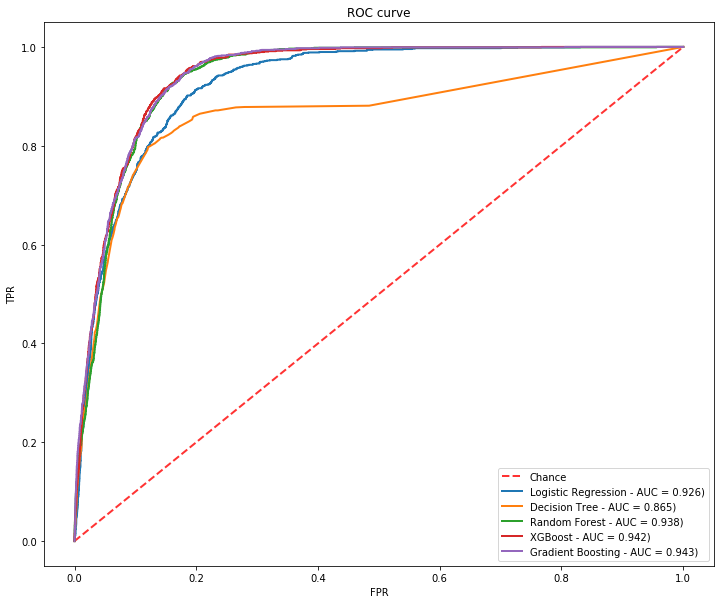

In [55]:
models = {'Logistic Regression': logmodel,
          'Decision Tree': dt_grid.best_estimator_,
          'Random Forest': rfc_grid.best_estimator_,
          'XGBoost': xgb_grid.best_estimator_,
          'Gradient Boosting': grad_boost}


plt.figure(figsize=(12, 10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
for name, model in models.items():
    roc = model_eval_test.roc(model)
    fpr = roc['fpr']
    tpr = roc['tpr']
    auc = roc['auc']
    plt.plot(fpr, tpr, lw=2, alpha=1, label='%s - AUC = %0.3f)' % (name, auc))
    
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()



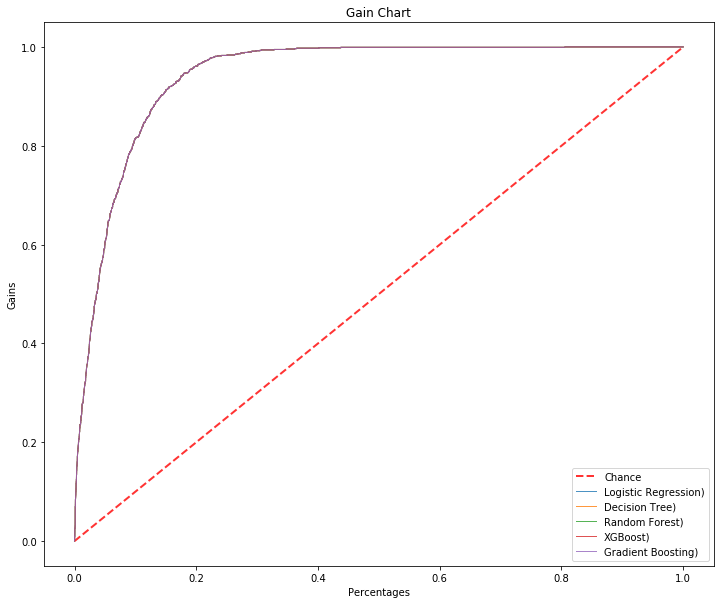

In [56]:
plt.figure(figsize=(12, 10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
for name, model in models.items():
    g = model_eval_test.gain(model)
    gains = g['gains']
    percentages = g['percentages']
    plt.plot(fpr, tpr, lw=1, alpha=0.8, label='%s)' % (name))
    
plt.xlabel('Percentages')
plt.ylabel('Gains')
plt.title('Gain Chart')
plt.legend(loc="lower right")
plt.show()

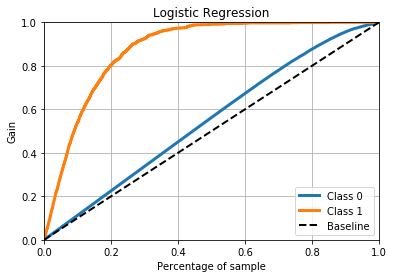

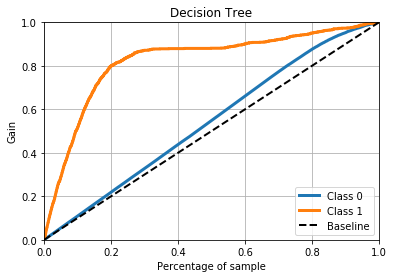

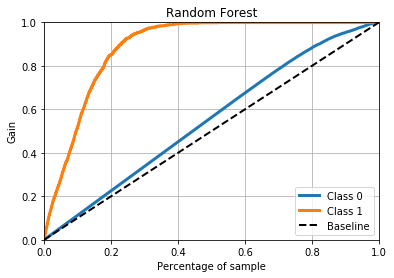

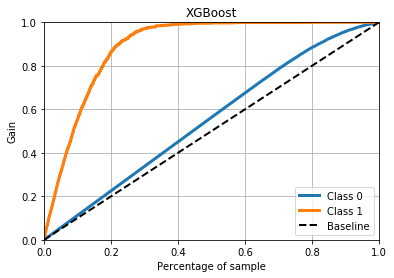

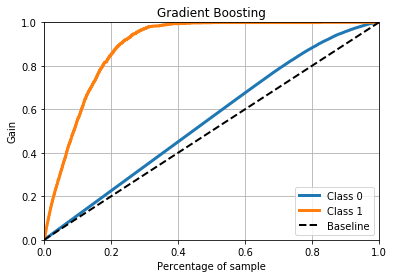

In [57]:
import scikitplot as skplt
for name, model in models.items():

    y_probas = model.predict_proba(X_test)
    skplt.metrics.plot_cumulative_gain(y_test, y_probas, title=name)

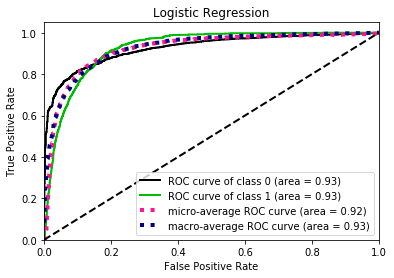

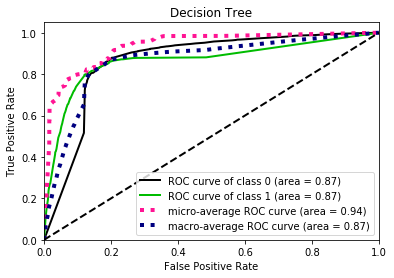

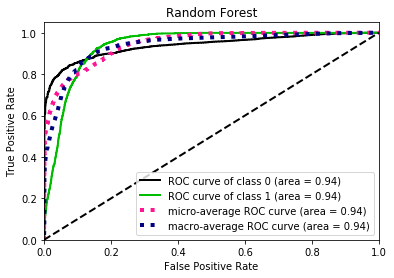

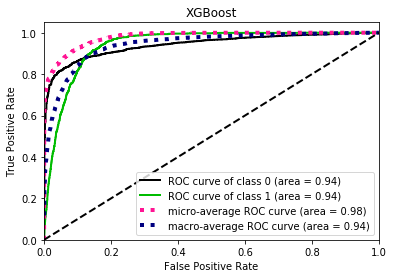

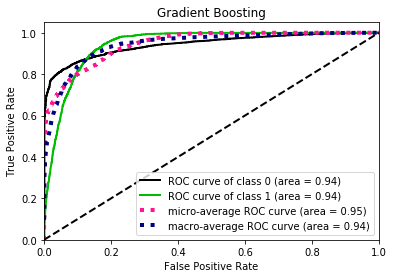

In [58]:
for name, model in models.items():

    y_probas = model.predict_proba(X_test)
    skplt.metrics.plot_roc_curve(y_test, y_probas, title=name)

In [59]:
# make a data frame for model selection
clf, f1, accuracy, recall, precision, area_under_curve = [], [], [], [], [], []
for name, model in models.items():
    res = model_eval_test.scores(model)
    clf.append(name)
    f1.append(res['f1'])
    accuracy.append(res['accuracy'])
    recall.append(res['recall'])
    precision.append(res['precision'])
    area_under_curve.append(res['auc'])
    
evaluation_df = pd.DataFrame({'clf': clf,
                              'f1': f1,
                              'accuracy': accuracy,
                              'recall': recall,
                              'precision': precision,
                              'auc': area_under_curve})  

In [60]:
evaluation_df.sort_values(by=['auc'], ascending=False)

,clf,f1,accuracy,recall,precision,auc
4,Gradient Boosting,0.573718,0.844958,0.925862,0.415635,0.942666
3,XGBoost,0.587856,0.912959,0.550862,0.630178,0.942367
2,Random Forest,0.579117,0.848067,0.927586,0.420970,0.938028
0,Logistic Regression,0.560536,0.853313,0.830172,0.423111,0.925544
1,Decision Tree,0.534334,0.837284,0.828448,0.394337,0.865405


In [61]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score